In [1]:
# Naive implementaion

# load data
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = list(data[:,0])
prices = list(data[:,1])
data_size = len(areas)

print('areas: ', areas)
print('prices: ', prices)
print('data_size: ', data_size)

plt.scatter(areas, prices)
plt.xlabel('Diện tích nhà (x 100$m^2$)')
plt.ylabel('Giá nhà (chục lượng vàng)')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

areas:  [6.7, 4.6, 3.5, 5.5]
prices:  [9.1, 5.9, 4.6, 6.7]
data_size:  4


<Figure size 640x480 with 1 Axes>

In [1]:
# full code

# load data
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = list(data[:,0])
prices = list(data[:,1])
data_size = len(areas)

# forward
def predict(x,w,b):
    return x*w + b

def compute_loss(z,y,delta=20):
    if abs(z-y) < delta:
        loss = (z - y)*(z - y)
    else:
        loss = delta*abs(z-y) - 1/2*delta*delta
    return loss

# compute gradient: square error
def gradient_sr(z,y,x):
    dw = 2*x*(z-y)
    db = 2*(z-y)
    
    return (dw, db)

# compute gradient: absolute difference
def gradient_ab(z,y,x,delta):
    dw = delta*x*(z-y)/abs(z-y)
    db = delta*(z-y)/abs(z-y)
    
    return (dw, db)

def gradient(z,y,x, delta=20):
    if abs(z-y) < delta:
        dw, db = gradient_sr(z,y,x)
    else:
        dw, db = gradient_ab(z,y,x,delta)

    return (dw, db)

# update weights
def update_weight(w,b,n,dw,db):
    w_new = w - n*dw
    b_new = b - n*db
    
    return (w_new, b_new)

# init weights
b = 0.04
w = -0.34
n = 0.01

# how long
epoch_max = 10

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(data_size):
        # get a sample
        x = areas[i]
        y = prices[i]
        
        # predict z
        z = predict(x,w,b)

        # compute loss
        loss = compute_loss(z,y)
        losses.append(loss)

        # compute gradient
        (dw, db) = gradient(z,y,x)

        # update weights
        (w, b) = update_weight(w,b,n,dw,db)

OSError: data.csv not found.

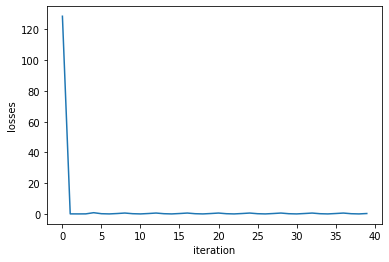

In [5]:
import matplotlib.pyplot as plt

plt.plot(losses) # test with losses[3:]
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()